In [3]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Correlation

In [5]:
hybrid = Table.read_table('http://inferentialthinking.com/notebooks/hybrid.csv')
hybrid.show(3)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact


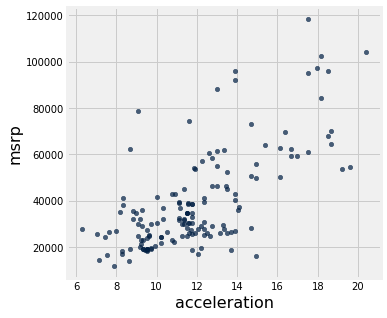

In [6]:
hybrid.scatter('acceleration', 'msrp')

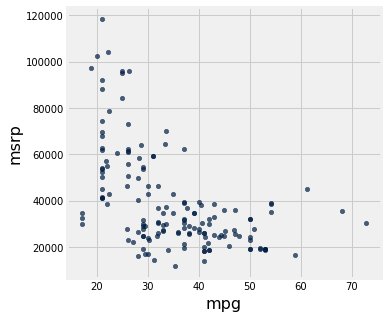

In [7]:
hybrid.scatter('mpg', 'msrp')

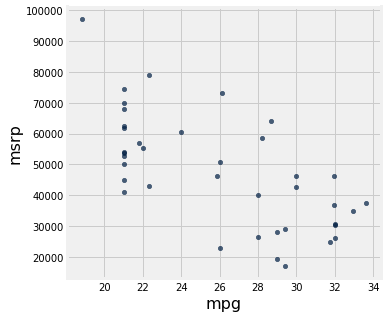

In [9]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

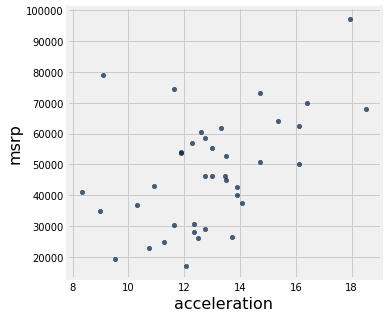

In [10]:
suv.scatter('acceleration', 'msrp')

In [14]:
mean = np.mean(suv.column('msrp'))
sd = np.std(suv.column('msrp'))
mean, sd

(47624.234358974361, 17981.965417645933)

In [ ]:
def standard_units(nums):
    mean = np.mean(nums)
    sd = np.std(nums)
    return (nums - mean) / sd
standard_units(suv.column('msrp'))

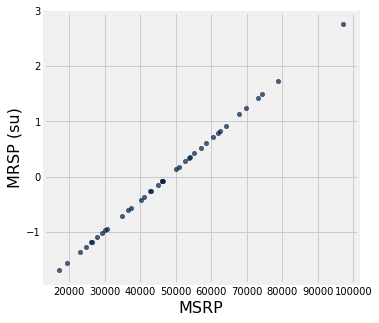

In [17]:
Table().with_columns(
    'MSRP', suv.column('msrp'),
    'MRSP (su)', standard_units(suv.column('msrp')),
).scatter(0, 1)

In [19]:
np.count_nonzero(standard_units(suv.column('msrp')) > 0) / len(suv.column('msrp'))

0.46153846153846156

In [22]:
def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

standardize(suv.select('mpg', 'msrp')).show(3)

mpg (su),msrp (su)
1.31784,-0.60884
0.48955,0.605991
0.747288,-1.02536


(-3, 3)

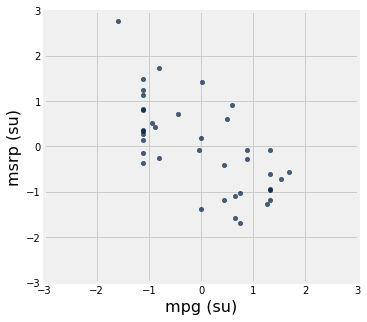

In [27]:
standardize(suv.select('mpg', 'msrp')).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(-3, 3)

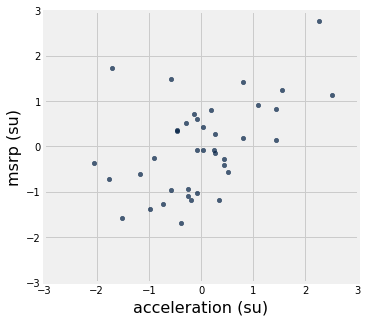

In [28]:
standardize(suv.select('acceleration', 'msrp')).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

## Visualizing Correlations

In [29]:
def r_scatter(r):
    "Generate a scatter plot with a correlation approximately r"
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()

In [31]:
_ = interact(r_scatter, r=(-1, 1, 0.1))

## Calculating r

In [42]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


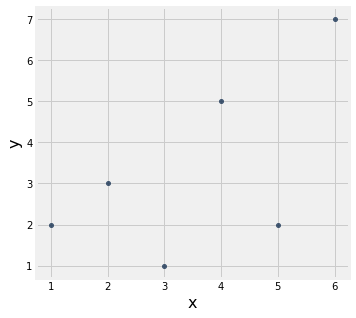

In [33]:
t.scatter(0, 1)

In [36]:
t_standard = standardize(t)
t_standard

x (su),y (su)
-1.46385,-0.648886
-0.87831,-0.162221
-0.29277,-1.13555
0.29277,0.811107
0.87831,-0.648886
1.46385,1.78444


In [37]:
t_standard.column(0) * t_standard.column(1)

array([ 0.94987138,  0.14248071,  0.33245498,  0.23746785, -0.56992283,
        2.6121463 ])

In [38]:
t_standard.with_column(
    'product', t_standard.column(0) * t_standard.column(1),
)

x (su),y (su),product
-1.46385,-0.648886,0.949871
-0.87831,-0.162221,0.142481
-0.29277,-1.13555,0.332455
0.29277,0.811107,0.237468
0.87831,-0.648886,-0.569923
1.46385,1.78444,2.61215


In [40]:
np.mean(t_standard.column(0) * t_standard.column(1))

0.61741639718977093

In [48]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))
                   * standard_units(t.column(y)))

correlation(t, 'x', 'y')

0.61741639718977093

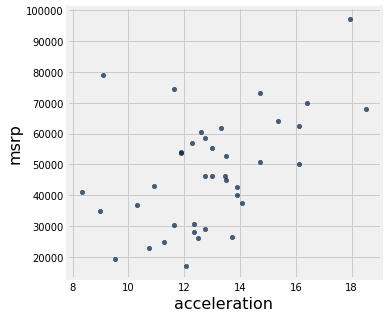

In [49]:
suv.scatter('acceleration', 'msrp')

In [50]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

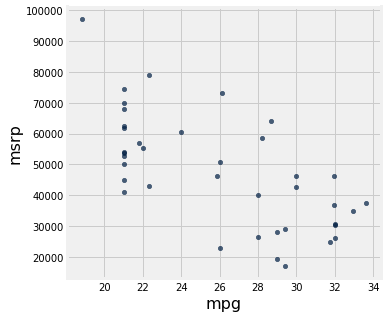

In [51]:
suv.scatter('mpg', 'msrp')

In [52]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919